In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv("contact_fp.csv")
df

,A60_contact,A61_contact,A62_contact,A63_contact,A64_contact,A65_contact,A66_contact,A67_contact,A68_contact,A69_contact,...,A340_contact,A341_contact,A342_contact,A343_contact,A344_contact,A345_contact,A346_contact,A347_contact,A348_contact,A401_contact
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40237,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
40238,0,0,0,0,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
40239,0,0,0,0,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
40240,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [4]:
df1 = df.loc[:, (df != 0).any(axis=0)]
df1

,A61_contact,A62_contact,A63_contact,A65_contact,A66_contact,A67_contact,A68_contact,A69_contact,A70_contact,A72_contact,...,A314_contact,A316_contact,A317_contact,A318_contact,A320_contact,A321_contact,A324_contact,A325_contact,A328_contact,A401_contact
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,1,0,0,1,0,0,...,1,0,1,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40237,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
40238,0,0,0,1,1,0,0,1,0,0,...,1,1,1,0,1,0,0,0,0,0
40239,0,0,0,1,1,0,0,1,0,0,...,0,0,1,0,1,1,0,0,0,0
40240,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [6]:
sse = {}
for k in range(1, 26):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df1)
    df1["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center

<ipython-input-6-090ab4847482>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["clusters"] = kmeans.labels_
<ipython-input-6-090ab4847482>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["clusters"] = kmeans.labels_
<ipython-input-6-090ab4847482>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

<ipython-input-6-090ab4847482>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["clusters"] = kmeans.labels_
<ipython-input-6-090ab4847482>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["clusters"] = kmeans.labels_


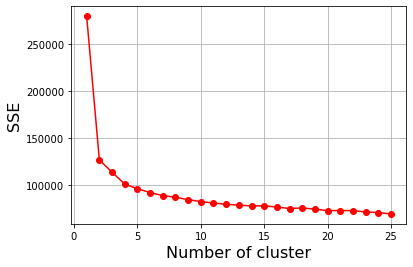

In [7]:
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), marker='o', color='red')
plt.xlabel("Number of cluster", fontsize=16)
plt.ylabel("SSE", fontsize=16)
plt.grid()
plt.show()
#plt.savefig("kmeans_contactres_elbow.png")

In [8]:
df1

,A61_contact,A62_contact,A63_contact,A65_contact,A66_contact,A67_contact,A68_contact,A69_contact,A70_contact,A72_contact,...,A316_contact,A317_contact,A318_contact,A320_contact,A321_contact,A324_contact,A325_contact,A328_contact,A401_contact,clusters
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,17
3,0,0,0,1,1,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,11
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40237,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,6
40238,0,0,0,1,1,0,0,1,0,0,...,1,1,0,1,0,0,0,0,0,16
40239,0,0,0,1,1,0,0,1,0,0,...,0,1,0,1,1,0,0,0,0,11
40240,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,19


In [9]:
df2 = df1.drop("clusters", axis=1)
df2

,A61_contact,A62_contact,A63_contact,A65_contact,A66_contact,A67_contact,A68_contact,A69_contact,A70_contact,A72_contact,...,A314_contact,A316_contact,A317_contact,A318_contact,A320_contact,A321_contact,A324_contact,A325_contact,A328_contact,A401_contact
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,1,0,0,1,0,0,...,1,0,1,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40237,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
40238,0,0,0,1,1,0,0,1,0,0,...,1,1,1,0,1,0,0,0,0,0
40239,0,0,0,1,1,0,0,1,0,0,...,0,0,1,0,1,1,0,0,0,0
40240,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [10]:
sil_avg = {}
for k in range(2, 26):
    kmeans = KMeans(n_clusters = k, max_iter=1000)
    kmeans_labels = kmeans.fit_predict(df2)
    sil_avg[k] = silhouette_score(df2, kmeans_labels)

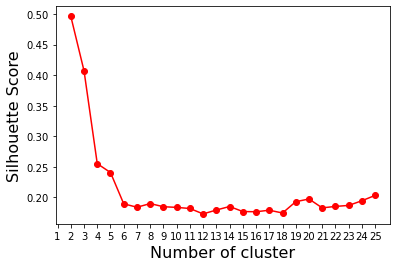

In [11]:
plt.figure()
plt.plot(list(sil_avg.keys()), list(sil_avg.values()), marker='o', color='red')
plt.xlabel("Number of cluster", fontsize=16)
plt.ylabel("Silhouette Score", fontsize=16)
plt.xticks(np.arange(1,26))
#plt.grid()
#plt.show()
plt.savefig("kmeans_contactfp_sil_score.png")